In [12]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
from glob import glob

from skimage.color import rgb2gray
from skimage.filters import rank

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Reading and Cleaning (Add labels from masks)

In [38]:
#file_path='/'
#
# outside of collab
from pathlib import Path
file_path = os.path.join(os.path.expanduser("~"), "Downloads/")

mask_files = glob(file_path + os.path.join('all_images','*','*_mask*'))
train_files = [file.replace('_mask', '') for file in mask_files]

In [39]:
print(file_path)

/Users/niloufar/Downloads/


In [40]:
def label(mask):
    value = np.max(imread(mask))
    return '1' if value > 0 else '0'
df = pd.DataFrame({"image": train_files,
                   "mask": mask_files,
                  "label":[label(x) for x in mask_files]})

In [41]:
df.shape

(3929, 3)

In [42]:
print(df.columns)
df.head()

Index(['image', 'mask', 'label'], dtype='object')


,image,mask,label
0,/Users/niloufar/Downloads/all_images/TCGA_CS_6...,/Users/niloufar/Downloads/all_images/TCGA_CS_6...,0
1,/Users/niloufar/Downloads/all_images/TCGA_CS_6...,/Users/niloufar/Downloads/all_images/TCGA_CS_6...,0
2,/Users/niloufar/Downloads/all_images/TCGA_CS_6...,/Users/niloufar/Downloads/all_images/TCGA_CS_6...,0
3,/Users/niloufar/Downloads/all_images/TCGA_CS_6...,/Users/niloufar/Downloads/all_images/TCGA_CS_6...,0
4,/Users/niloufar/Downloads/all_images/TCGA_CS_6...,/Users/niloufar/Downloads/all_images/TCGA_CS_6...,0


Image Exploratory Analysis and Checking classes

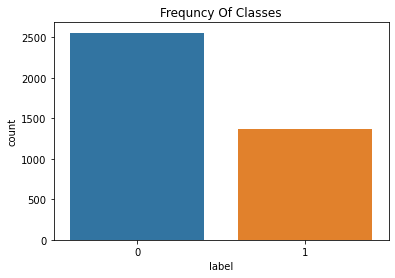

In [45]:
sns.countplot(data=df,x=df['label'])
plt.title('Frequncy Of Classes')
plt.show()

In [46]:
List_of_images= [ plt.imread(path) for path in df["image"]  ]
List_gray_images = [rgb2gray(rgb_img) for rgb_img in List_of_images]

List_of_images = np.array(List_of_images)
List_gray_images = np.array(List_gray_images)

In [47]:
List_gray_images.shape

(3929, 256, 256)

Confirming the Size of all Images

Text(0.5, 1.0, 'Histogram of image height')

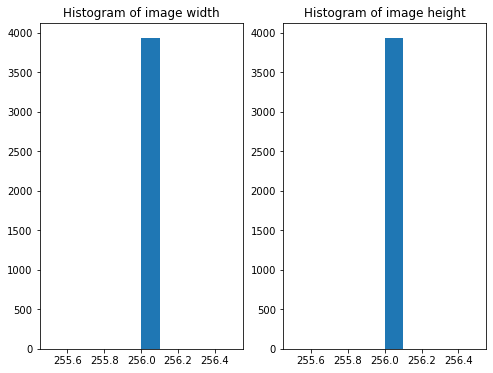

In [48]:
IMAGE_WIDTH = []
IMAGE_HEIGHT = []

for path in df['image']:
  IMAGE_WIDTH.append(imread(path).shape[0])
  IMAGE_HEIGHT.append(imread(path).shape[1])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
width_hist = axes[0].hist(IMAGE_WIDTH)
height_hist = axes[1].hist(IMAGE_HEIGHT)
axes[0].set_title("Histogram of image width")
axes[1].set_title("Histogram of image height")

In [49]:
from skimage.color import rgb2gray
from skimage import filters
from skimage.morphology import disk, ball

def show_image_and_mask(img_path, mask_path):
    rgb_img = imread(img_path)
    gray_img = rgb2gray(rgb_img)
    #filtered_img = filters.farid(gray_img)
    #filtered_img = filters.rank.equalize(gray_img,disk(20))
    filtered_img = filters.rank.enhance_contrast(gray_img,disk(5))
    mask_img = imread(mask_path)
    

    fig, axes = plt.subplots(1, 4, figsize=(10, 8))
    ax = axes.ravel()
    ax[0].imshow(rgb_img)
    ax[0].set_title("RGB image")
    ax[1].imshow(gray_img, cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")
    ax[2].imshow(filtered_img,cmap=plt.cm.gray )
    ax[2].set_title("Filtered Image")
    ax[3].imshow(mask_img)
    ax[3].set_title("Mask")
    fig.tight_layout()